In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

# Display of Metadata
This document will show you a display of the metadata for the the experiment data saved in the directory `./data/`.

## Loading data
All data is saved in the directory `./data`. Each experiment has its own folder and should contain three elemets:
 - A `.txt` file with info about the experiment
 - A folder with EEG data
 - A folder with data from the Empatica E4
 
 This file will care most about the metadata found in the `.txt` file.

In [2]:
# Load the data
base_path = './data/'

experiments = [] # data from all the experiments

for exp_dir in os.scandir(base_path):# Search through experiment folders
#     print(exp_dir.name);
    if(exp_dir.is_dir()):
        print("dir %s found" % exp_dir.name)
        for entry in os.scandir(exp_dir.path):
            if entry.is_file and entry.name.endswith('.txt'):
                print("Found .txt file " + entry.name)
                with open(entry.path, 'r') as f:
                    print("reading file")
                    exp_data_string = f.readlines()[-1]
                    exp_data = json.loads(exp_data_string)
                    experiments.append(exp_data)
                    print("File added to experiments")
            else:
                continue

N_experiments = len(experiments)

dir Experiment_03_11_21 found
Found .txt file Experiment_metadata_Eksperiment_03_11_2021_data.txt
reading file
File added to experiments
dir Experiment_04_11_21 found
Found .txt file Experiment_metadata_Eksperiment_4_11_2021_data.txt
reading file
File added to experiments
dir Experiment_05_11_21 found
Found .txt file Experiment_metadata_Eksperiment_5_11_2021_data.txt
reading file
File added to experiments
dir Experiment_10_11_21 found
Found .txt file Experiment_metadata_Eksperiment_10_11_2021_data.txt
reading file
File added to experiments
dir Experiment_11_11_21_01 found
Found .txt file Experiment_metadata_Experiment_11_11_2021_01_data.txt
reading file
File added to experiments
dir Experiment_11_11_21_02 found
Found .txt file Experiment_metadata_Eksperiment_11_11_2021_02_data.txt
reading file
File added to experiments
dir Experiment_18_11_21_01 found
Found .txt file Experiment_metadata_Experiment_18_11_2021_01_data.txt
reading file
File added to experiments
dir Experiment_18_11_21_02 

## Extracting information
Now we wish to have an overview over the different information from all the experiments.

In [3]:
# Extracting information
consent = []
date = []
start_time = []

SAM_change_valence = {'baseline' : [], 'sad' : [], 'relaxed' : [], 'excited' : [], 'afraid' : []}
SAM_change_arousal = {'baseline' : [], 'sad' : [], 'relaxed' : [], 'excited' : [], 'afraid' : []}

SAM_after_valence = {'baseline' : [], 'sad' : [], 'relaxed' : [], 'excited' : [], 'afraid' : []}
SAM_after_arousal = {'baseline' : [], 'sad' : [], 'relaxed' : [], 'excited' : [], 'afraid' : []}
# experiments = experiments[0]

# experiments = [experiments[0]]

for exp in experiments: 
#     print(exp.keys())
    
    # Consent
    consent.append(bool(exp["consent"]))
    
    # Date
    date.append(exp["start_date"])
    
    # Start time
    start_time.append(exp["start_time"])
    
    # Change in self-assessment values
    emotion_data = exp["emotion_data"]
    for emotion,data in emotion_data.items():
#         print(emotion)
        
        if emotion == "baseline": # Baseline does currently not have a pre and post SAM
            continue
        
        # Valence
        valence_before = float(data["pre_self_assessment"]["SAM"]["valence"]) - 5
        valence_after = float(data["post_self_assessment"]["SAM"]["valence"]) - 5

        SAM_change_valence[emotion].append(valence_after - valence_before)
        SAM_after_valence[emotion].append(valence_after)
        
        # Arousal
        arousal_before = float(data["pre_self_assessment"]["SAM"]["arousal"]) - 5 # shift so it centers at origin
        arousal_after = float(data["post_self_assessment"]["SAM"]["arousal"]) - 5
        
        SAM_change_arousal[emotion].append(arousal_after - arousal_before)
        SAM_after_arousal[emotion].append(arousal_after)
        
        

print(SAM_change_valence)
#     print(SAM_change_arousal)
    

{'baseline': [], 'sad': [-2.0, -4.0, -4.0, -2.0, -2.0, -2.0, -4.0, -4.0, -5.0, -4.0], 'relaxed': [1.0, 2.0, -2.0, -2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0], 'excited': [3.0, 5.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0], 'afraid': [1.0, -2.0, -2.0, -1.0, -2.0, 0.0, -4.0, -2.0, 0.0, -2.0]}


## Plots

### Consent

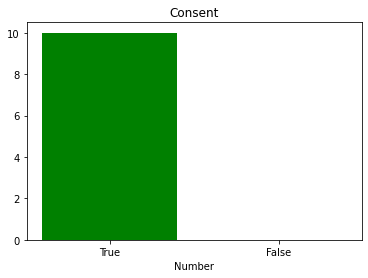

In [4]:
# Plotting
## Consent
plt.bar([1,2],[np.sum(np.array(consent)), len(consent) - np.sum(np.array(consent))], tick_label= ["True", "False"], color = ["green","red"])
plt.xlabel("Number")
plt.title("Consent")

plt.show()


### Date and time


In [5]:
# Date
dates = list.sort(date)

# Time
times = list.sort(start_time)


### Self assessment change

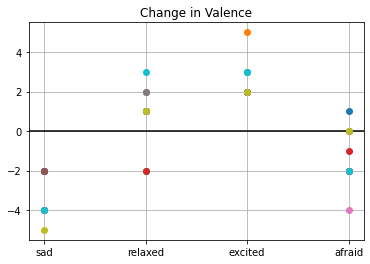

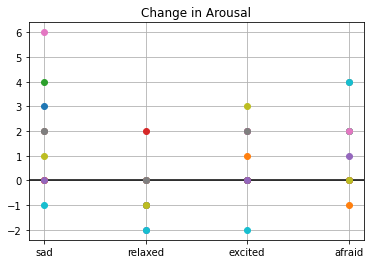

In [6]:
x_values = ["sad", "relaxed", "excited", "afraid"]
colors = ["r", "b", "g", "y"]

# Valence
y_valence = list(SAM_change_valence.values())
y_valence = np.array(y_valence[1:])
# print(y_values)
# print(y_values[:,0])

plt.figure()
for i in range(N_experiments):
    plt.scatter(x_values, y_valence[:,i], zorder=3)

plt.grid()

plt.axhline(0, color="black")

plt.title("Change in Valence")

plt.show()


# Arousal
y_arousal = list(SAM_change_arousal.values())
y_arousal = np.array(y_arousal[1:])

plt.figure()
plt.grid()

for i in range(N_experiments):
    plt.scatter(x_values, y_arousal[:,i], zorder=3)

plt.axhline(0, color="black")

plt.title("Change in Arousal")

plt.show()



#### Valence and arousal for different emotions

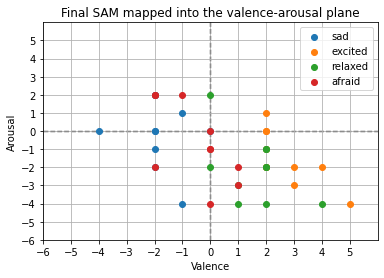

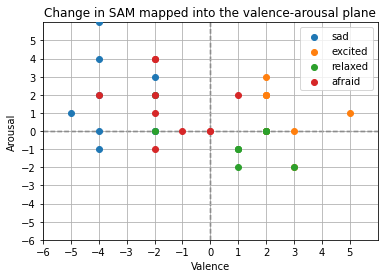

In [7]:
emotions = ["sad", "excited","relaxed","afraid"]

valence_change = list(SAM_change_valence.values())
arousal_arousal = list(SAM_change_arousal.values())

# Combined figure
plt.figure()
plt.grid()

# Axis lines
plt.axhline(0, color="black", linestyle = '--', linewidth = "1.3", zorder=1)
plt.axvline(0, color="black", linestyle = '--', linewidth = "1.3", zorder=1)

# Align plot
plt.xlim(-6,6)
plt.ylim(-6,6)

plt.xticks(np.arange(-6, 6, step=1))
plt.yticks(np.arange(-6, 6, step=1))

# Labels
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Final SAM mapped into the valence-arousal plane")

for emotion in emotions:
    # plot data
    plt.scatter(SAM_after_valence[emotion], SAM_after_arousal[emotion], zorder = 3, label=emotion)
    
plt.legend()
plt.show()


# Combined figure change
plt.figure()
plt.grid()

# Axis lines
plt.axhline(0, color="black", linestyle = '--', linewidth = "1.3", zorder=1)
plt.axvline(0, color="black", linestyle = '--', linewidth = "1.3", zorder=1)

# Align plot
plt.xlim(-6,6)
plt.ylim(-6,6)

plt.xticks(np.arange(-6, 6, step=1))
plt.yticks(np.arange(-6, 6, step=1))

# Labels
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Change in SAM mapped into the valence-arousal plane")

for emotion in emotions:
    # plot data
    plt.scatter(SAM_change_valence[emotion], SAM_change_arousal[emotion], zorder = 3, label=emotion)
    
plt.legend()
plt.show()


# # Individual figures

# plt.figure()

# for emotion in emotions:
#     plt.subplots()
#     plt.grid()
    
#     # Axis lines
#     plt.axhline(0, color="black", linestyle = '--', linewidth = "1.3", zorder=1)
#     plt.axvline(0, color="black", linestyle = '--', linewidth = "1.3", zorder=1)

#     # Align plot
#     plt.xlim(-5,5)
#     plt.ylim(-5,5)

#     plt.xticks(np.arange(-5, 5, step=1))
#     plt.yticks(np.arange(-5, 5, step=1))

#     # Labels
#     plt.xlabel("Valence")
#     plt.ylabel("Arousal")
#     plt.title(emotion)

#     # plot data
#     plt.scatter(SAM_after_valence[emotion], SAM_after_arousal[emotion], zorder = 3)

# plt.show()
